# Random Forest Classification Advanced

In [50]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance


In [51]:
# import
data_for_model = pd.read_pickle("C://Users/sophi/Python Projects/DSI/data/abc_classification_modelling.p")

In [52]:
data_for_model.drop("customer_id", axis = 1, inplace = True)

In [53]:
# shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [54]:
# class balance
data_for_model['signup_flag'].value_counts(normalize=True)

signup_flag
0    0.689535
1    0.310465
Name: proportion, dtype: float64

In [55]:
# Deal with Missing Values
data_for_model.isna().sum()
data_for_model.dropna(how = "any", inplace = True)

In [56]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [57]:
# split input variables & output variable
X = data_for_model.drop(["signup_flag"], axis = 1)
y = data_for_model["signup_flag"]

In [58]:
# split out training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [67]:
# deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse_output=False,drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)



X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True),X_train_encoded.reset_index(drop=True)], axis= 1)
X_train.drop(categorical_vars, axis = 1 , inplace =True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True),X_test_encoded.reset_index(drop=True)], axis= 1)
X_test.drop(categorical_vars, axis = 1 , inplace =True)

In [69]:
# Model Training
clf = RandomForestClassifier(random_state = 42, n_estimators = 500, max_features = 5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)

In [70]:
# Model Assessment
# Access Model Accuracy

y_pred_class = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:,1]


In [71]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test,y_pred_class)


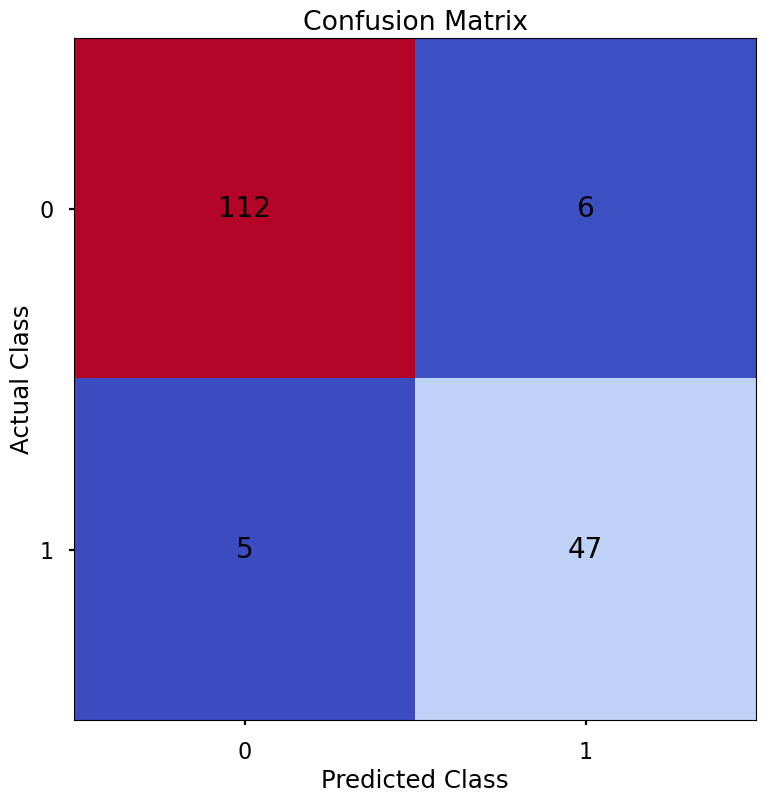

In [72]:
plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap ="coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center",va ="center", fontsize =20)
plt.show()

In [76]:
# Accuracy (the number of correct classifications out of all attempted classifications)

accuracy_score(y_test, y_pred_class)

0.9352941176470588

In [79]:
# Precision Score ( of all the observations that were predicted as positive, how many were actually positive)

precision_score(y_test, y_pred_class)

0.8867924528301887

In [81]:
# Recall Score ( of all the positive observations, how many did we predict  positive)

recall_score(y_test, y_pred_class)

0.9038461538461539

In [83]:
# F1 Score (Harmonic Mean of Precision and Recall Score)

f1_score(y_test, y_pred_class)

0.8952380952380953

In [85]:
# Feature Importance


feature_importance = pd.DataFrame(clf.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names,feature_importance], axis= 1)
feature_importance_summary.columns = ["input_variable","feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True )

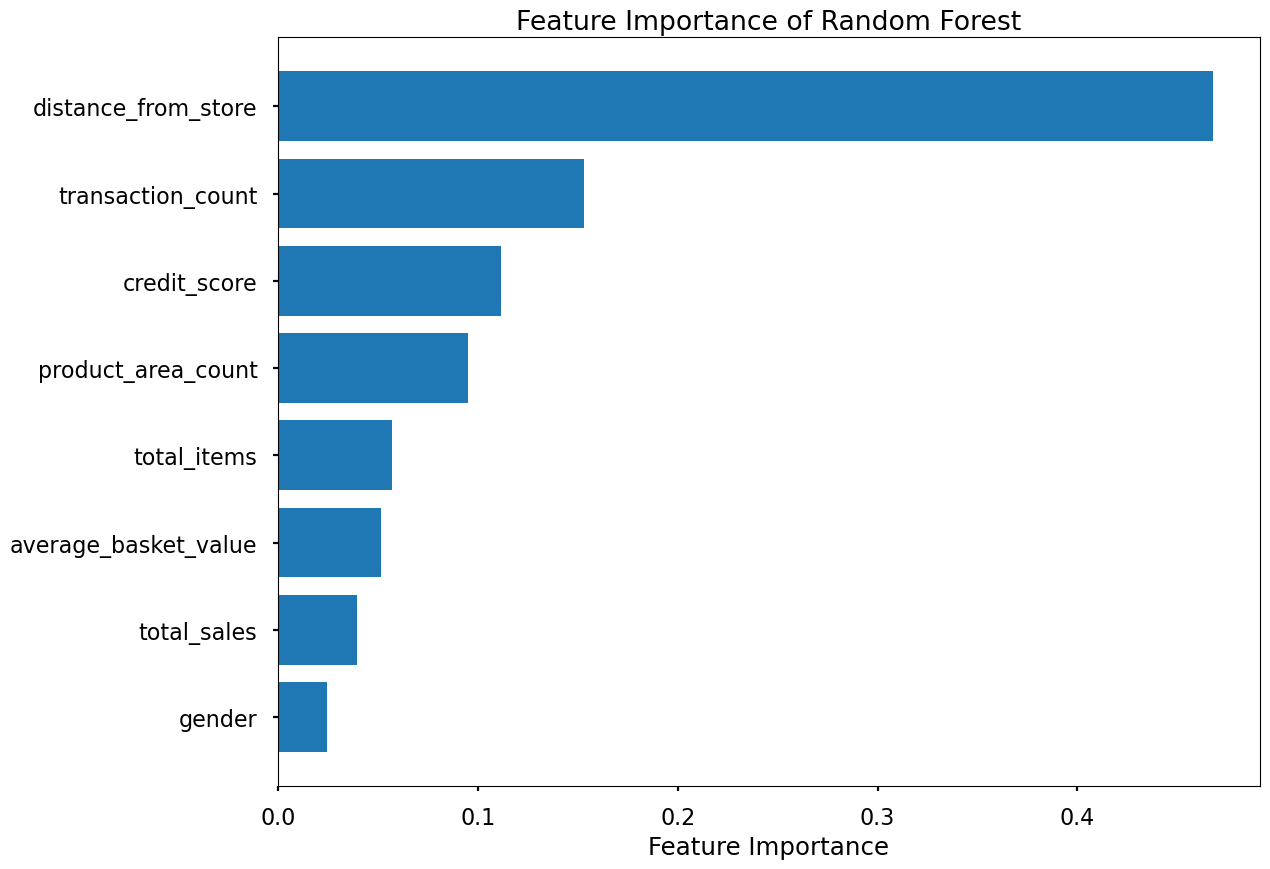

In [87]:
plt.barh(feature_importance_summary["input_variable"],feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [89]:
# Permutation Importance

result = permutation_importance(clf,X_test, y_test, n_repeats=10, random_state= 42)

In [90]:
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names,permutation_importance], axis= 1)
permutation_importance_summary.columns = ["input_variable","permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True )

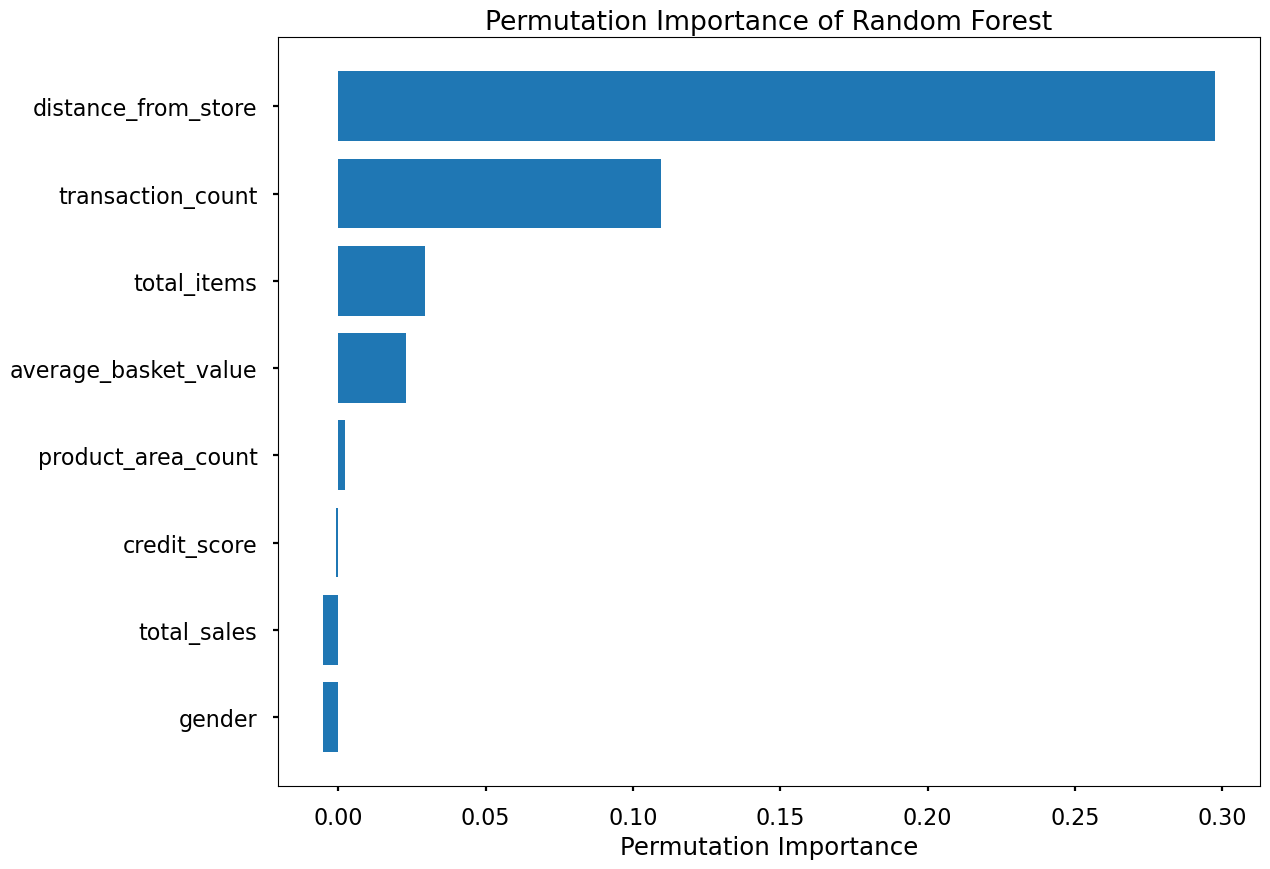

In [93]:
plt.barh(permutation_importance_summary["input_variable"],permutation_importance_summary["permutation_importance"])
plt.title("Permutation Importance of Random Forest")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()